<h2 Style = "color:  #00a8c6 ">Carga y estandarizacion de los set de datos</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
#----------------------------------------#
from scipy.stats import zscore
import seaborn as sn
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')
#----------------------------------------#
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#----------------------------------------#
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dfsongs = pd.read_csv("01-Entradas/song_data.csv", sep= ",", encoding= "utf-8", low_memory=False)
print("Datos Cargados")
dfsongs.head(5)

Datos Cargados


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [3]:
dfsongs.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

In [4]:
dfsongs.shape

(18835, 15)

In [5]:
dfsongs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


<h3 style="color:#40c0cb;text-align: center;"> Sin Errores de carga</h3>

<h2 Style="color: #00a8c6 "> Valores faltantes</h2> 

In [6]:
dfsongs.head(5)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [7]:
dfTemp = dfsongs.isnull()
dfTemp.head(3)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
for columna in dfTemp.columns.values.tolist():
    print(dfTemp[columna].value_counts())
    print('')

song_name
False    18835
Name: count, dtype: int64

song_popularity
False    18835
Name: count, dtype: int64

song_duration_ms
False    18835
Name: count, dtype: int64

acousticness
False    18835
Name: count, dtype: int64

danceability
False    18835
Name: count, dtype: int64

energy
False    18835
Name: count, dtype: int64

instrumentalness
False    18835
Name: count, dtype: int64

key
False    18835
Name: count, dtype: int64

liveness
False    18835
Name: count, dtype: int64

loudness
False    18835
Name: count, dtype: int64

audio_mode
False    18835
Name: count, dtype: int64

speechiness
False    18835
Name: count, dtype: int64

tempo
False    18835
Name: count, dtype: int64

time_signature
False    18835
Name: count, dtype: int64

audio_valence
False    18835
Name: count, dtype: int64



In [9]:
def missing_cols(df):
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} =>{df[col].isnull().sum()}")
    if total == 0:
        print ("No hay valores faltantes")
missing_cols(dfsongs)

No hay valores faltantes


<h3 style="color:#40c0cb;text-align: center;"> Sin Valores Faltantes</h3>

<h2 Style="color: #00a8c6 "> Estandarizacion de Datos </h2> 

In [10]:
dfsongs.head(2)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.00552,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.01030,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370


In [11]:
dfsongs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [12]:
dfsongs.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [13]:
df = pd.DataFrame(dfsongs)
pd.set_option('display.float_format', '{:.2f}'.format)
dfround = df.describe()
dfsongs['song_duration_ms'] = dfsongs['song_duration_ms'].round(2)
for col in ['song_duration_ms']:
    dfsongs[col] = dfsongs[col].astype(float)

<h3 style="color:#40c0cb;text-align: center;"> Los datos del Data Frame tiene Hay datos que estandarizar </h3>

In [14]:
dfround

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00
mean,52.99,218211.59,0.26,0.63,0.64,0.08,5.29,0.18,-7.45,0.63,0.10,121.07,3.96,0.53
std,21.91,59887.54,0.29,0.16,0.21,0.22,3.61,0.14,3.83,0.48,0.10,28.71,0.30,0.24
min,0.00,12000.00,0.00,0.00,0.00,0.00,0.00,0.01,-38.77,0.00,0.00,0.00,0.00,0.00
25%,40.00,184339.50,0.02,0.53,0.51,0.00,2.00,0.09,-9.04,0.00,0.04,98.37,4.00,0.34
50%,56.00,211306.00,0.13,0.65,0.67,0.00,5.00,0.12,-6.55,1.00,0.06,120.01,4.00,0.53
75%,69.00,242844.00,0.42,0.75,0.81,0.00,8.00,0.22,-4.91,1.00,0.12,139.93,4.00,0.72
max,100.00,1799346.00,1.00,0.99,1.00,1.00,11.00,0.99,1.58,1.00,0.94,242.32,5.00,0.98


In [15]:
dfsongs.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00
mean,52.99,218211.59,0.26,0.63,0.64,0.08,5.29,0.18,-7.45,0.63,0.10,121.07,3.96,0.53
std,21.91,59887.54,0.29,0.16,0.21,0.22,3.61,0.14,3.83,0.48,0.10,28.71,0.30,0.24
min,0.00,12000.00,0.00,0.00,0.00,0.00,0.00,0.01,-38.77,0.00,0.00,0.00,0.00,0.00
25%,40.00,184339.50,0.02,0.53,0.51,0.00,2.00,0.09,-9.04,0.00,0.04,98.37,4.00,0.34
50%,56.00,211306.00,0.13,0.65,0.67,0.00,5.00,0.12,-6.55,1.00,0.06,120.01,4.00,0.53
75%,69.00,242844.00,0.42,0.75,0.81,0.00,8.00,0.22,-4.91,1.00,0.12,139.93,4.00,0.72
max,100.00,1799346.00,1.00,0.99,1.00,1.00,11.00,0.99,1.58,1.00,0.94,242.32,5.00,0.98


In [16]:
df.shape

(18835, 15)

<h2 Style="color: #00a8c6 "> Visualizacion de Datos </h2> 

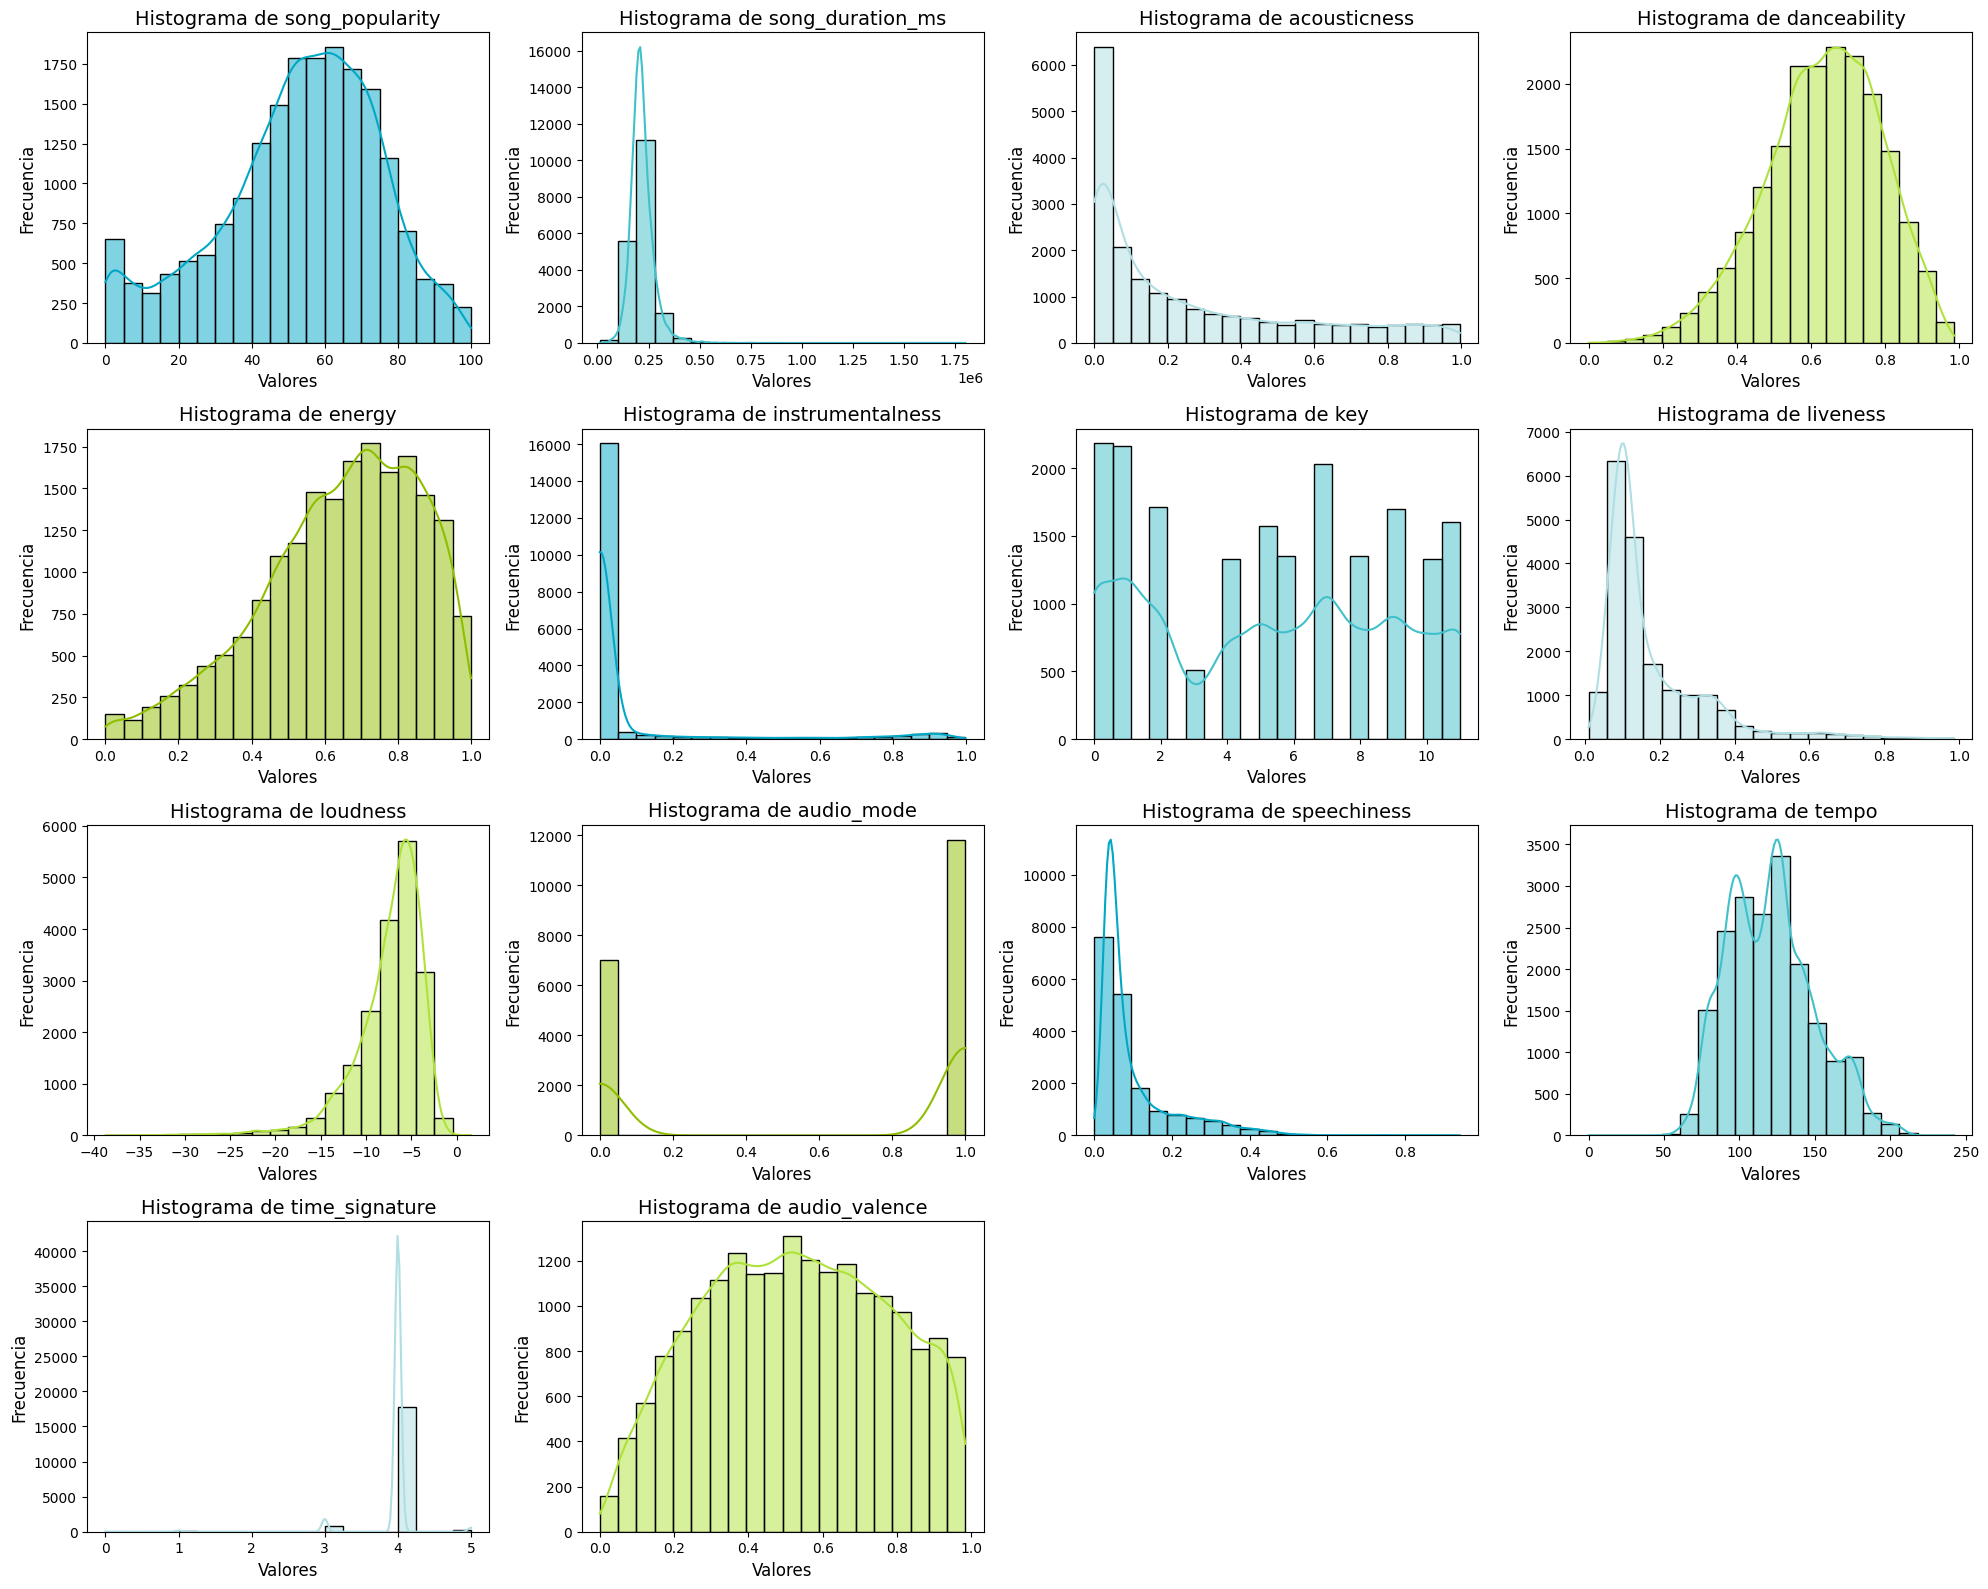

In [17]:
df_grafics = dfsongs.select_dtypes(include='number')  
  
num_vars = len(df_grafics.columns)  
cols = 4  
rows = (num_vars // cols) + (num_vars % cols > 0)  

plt.figure(figsize=(20, rows * 4))  
  
paleta =['#00a8c6','#40c0cb','#afdee3','#aee239','#8fbe00']  

for i, columna in enumerate(df_grafics.columns, 1):  
    plt.subplot(rows, cols, i)  
    sn.histplot(df_grafics[columna].dropna(), kde=True, color=paleta[(i-1) % len(paleta)], bins=20) 
    plt.title(f'Histograma de {columna}', fontsize=14)  
    plt.xlabel('Valores', fontsize=12)  
    plt.ylabel('Frecuencia', fontsize=12)  

plt.tight_layout()  
plt.show()

<h3 style="color:#40c0cb;text-align: center;"> Graficos Creados y Data Set listo para el analisis en Machine Learning </h3>